#### Helper Code

This code runs out of the box on Google Colab. It is also the recommended way to run this notebook if you do not already have an environment with Python 3 and TensorFlow already set up.

In [0]:
import numpy as np
import os

matplotlib_style = "ggplot"
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')

from IPython.core.pylabtools import figsize
notebook_screen_res = "retina"
%config InlineBackend.figure_format = notebook_screen_res

from IPython.display import clear_output

In [2]:
import tensorflow as tf
try:
    tf.enable_eager_execution()
    print("Enabled eager execution")
except Exception as e:
    print(e)
    print("Eager execution:", tf.executing_eagerly() )
    

import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

print("TensorFlow\t\t", ":", tf.__version__)
print("TensorFlow Probability\t", ":", tfp.__version__)

from tensorflow.python.client import device_lib

local_device_protos = device_lib.list_local_devices()
print("Devices:")
print([x.name for x in local_device_protos])

Enabled eager execution

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

TensorFlow		 : 1.13.1
TensorFlow Probability	 : 0.6.0
Devices:
['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:GPU:0']


In [0]:
def evaluate(tensors):
    """Evaluates Tensor or EagerTensor to Numpy `ndarray`s.
    Args:
    tensors: Object of `Tensor` or EagerTensor`s; can be `list`, `tuple`,
      `namedtuple` or combinations thereof.
 
    Returns:
      ndarrays: Object with same structure as `tensors` except with `Tensor` or
        `EagerTensor`s replaced by Numpy `ndarray`s.
    """
    return tf.contrib.framework.nest.pack_sequence_as(tensors,
                                                      [t.numpy() if tf.contrib.framework.is_tensor(t) else t
                                                       for t in tf.contrib.framework.nest.flatten(tensors)])

In [0]:
from sklearn.metrics import mean_squared_error

# 04. Sampling from Distributions

## Sampling


**Conjugate priors**

Family of conjugate priors: If we choose a prior from $\Psi$, then sampling from the prior will result in a posterior will also in $\Psi$. In other words, $\Psi$ is closed under sampling from this given class of distributions.

| Sampling From | Posterior Distribution |
| ------------------------- | ----------------------------------- |
| Bernoulli             | beta      |
| binomial             | beta       |
| geometric           | beta      |
| poisson              | gamma |
| exponential        | gamma |
| normal                 | normal |


## Sampling from Exponential Distribution

A lighting company has designed a new light bulb model. They are interested in ﬁnding out how long each light bulb lasts.

Consider a statistical model consisting of observable exponential RV $X_1 ... X_{10}$ that are conditionally iid given the parameter $\theta$.

Each $X_i$ represents the lifespan (in hours) of the $i$-th light bulb. Suppose that $\theta$ is a gamma RV with prior hyperparameters 10 and 4500.


In [0]:
alpha, beta = 4500, 10

theta = tfd.Gamma(concentration=alpha,
                  rate=beta)

Suppose that the observed values are represented by X:

In [6]:
X_sample = theta.sample(10).numpy()
X_sample = X_sample.tolist()
print(X_sample)

[468.89532470703125, 449.02099609375, 453.14276123046875, 443.4800720214844, 446.556396484375, 433.7247009277344, 445.9922790527344, 450.74871826171875, 441.1000061035156, 439.92608642578125]


From the given information, we can determine the posterior distribution of $\theta$ is a gamma distribution with hyperparameters $\alpha'$ and $\beta'$. We can also see how a biased (offset) sample can affect the posterior distribution.

𝛼′ = 9407.259399414062 𝛽′ = 20


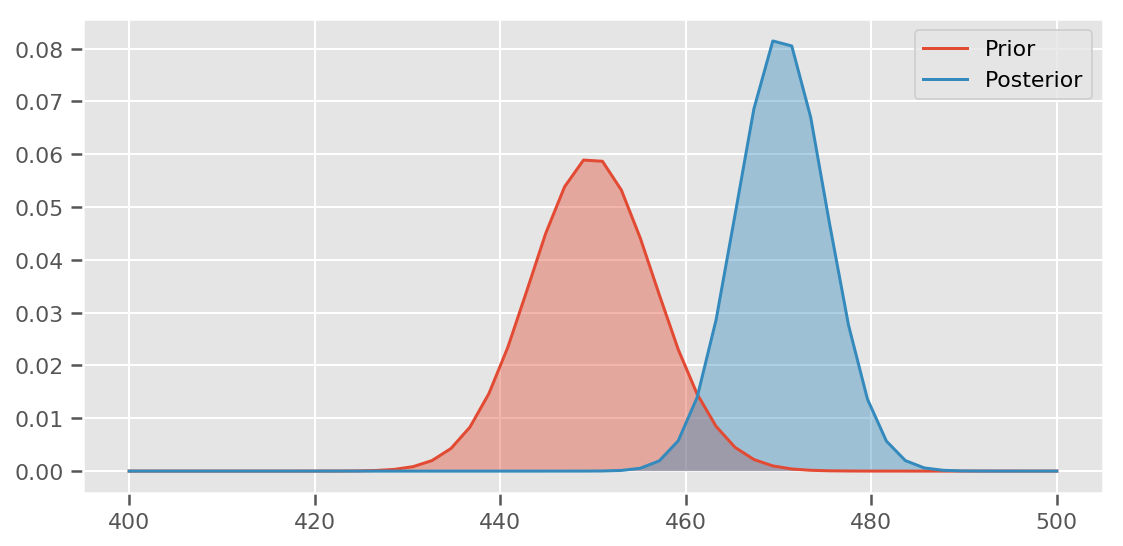

In [7]:
#@title Add offset to sample  { run: "auto" }
offset = 40 #@param {type:"slider", min:-100, max:100, step:1}

X = theta.sample(10).numpy()
X += offset
X = X.tolist()

alpha_p = alpha + sum(X)
beta_p = beta + len(X)

print("𝛼′ =", alpha_p, "𝛽′ =", beta_p)

theta_p = tfd.Gamma(concentration=alpha_p,
                    rate=beta_p)

n = 50
start = tf.constant(400., dtype="float32")
space = tf.linspace(start=start, stop=500., num=n, name="linspace")

theta_values = theta.prob(space[:, tf.newaxis])
theta_values = tf.transpose(theta_values)
theta_values = theta_values.numpy().reshape((n))

theta_p_values = theta_p.prob(space[:, tf.newaxis])
theta_p_values = tf.transpose(theta_p_values)
theta_p_values = theta_p_values.numpy().reshape((n))

plt.figure(figsize(8, 4))

plt.plot(space,
         theta_values,
         label="Prior")
plt.fill_between(space, 0, theta_values, alpha=0.4)

plt.plot(space,
         theta_p_values,
         label="Posterior")
plt.fill_between(space, 0, theta_p_values, alpha=0.4)

plt.legend()

plt.tight_layout()
plt.show()

## References

1. Lecture 15, 16, Introduction to Probability and Statistics, 50.034 (2018), Singapore University of Technology and Design

